#**LUIS Usability Survey Analysis**


Link to dataset: https://docs.google.com/spreadsheets/d/1pJABUJInZvrR9wAjI9tFcJxLmnagpA75/edit?usp=sharing&ouid=113956793198524584763&rtpof=true&sd=true


Link to Google Collab: https://colab.research.google.com/drive/1zV18yBHV0xWqdTXqN4acmgJbYxc2Nwe3?usp=sharing

##**STEP 1- Loading the prepared CSV file from Google Drive and displaying the first few rows to confirm structure**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

print("⚠️ Dataset loaded.")

# Path to cleaned Excel file
file_path = '/content/drive/MyDrive/Zogota_Thesis_Repository/LUIS_Usability_Survey_Cleaned.xlsx'

# Load Excel file
df = pd.read_excel(file_path, engine='openpyxl')

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Basic inspection
display(df.head())
df.info()


Mounted at /content/drive
⚠️ Dataset loaded.


,timestamp,role,experience,usage_frequency,devices,workflows_used,workflows_used_count,workflow_to_improve,workflow_category,workflow_frequency,...,friction_tags,stuck_point,stuck_tags,key_fix,key_fix_category,priority_workflows,priority_primary,priority_secondary,clarity_importance,comments
0,2025-11-11 14:20:05.605,Administrative staff,1-3 years,Daily,Desktop / Laptop,View or update personal profile / contact info...,NaN,Find a student’s transcript and export it (PDF...,NaN,Daily,...,NaN,to find the students i need to first search fo...,NaN,if entering the students name sistem would alr...,NaN,"Enter / Edit an exam grade, Enrol / Unenrol a ...",NaN,NaN,5,the cognitive load is too much.
1,2025-11-11 14:26:33.163,Administrative staff,1-3 years,Daily,Desktop / Laptop,"Search and register for courses, View course s...",NaN,Enter / Edit an exam grade,NaN,Weekly,...,NaN,Importing often is full of mistakes.,NaN,I would wish for students to be sorted into pr...,NaN,Submit or approve course grades,NaN,NaN,5,The mistakes in the system are often unpredict...
2,2025-11-11 14:49:20.729,Administrative staff,1-3 years,Daily,Desktop / Laptop,"View course schedule, Enter / Edit an exam gra...",NaN,Prepare academic reports or statistics,NaN,Daily,...,NaN,Understanding which are correct courses to pick,NaN,"honestly, this is a difficult task, so intuiti...",NaN,Create or update course information,NaN,NaN,4,NaN
3,2025-11-11 14:53:29.280,Student,Less than 6 months,A few times per month,"Desktop / Laptop, Mobile phone","View course schedule, Find a student’s transcr...",NaN,Approve or update a study plan,NaN,Monthly,...,NaN,NaN,NaN,NaN,NaN,Submit or approve course grades,NaN,NaN,4,NaN
4,2025-11-11 14:53:39.998,Student,6-12 months,A few times per month,"Desktop / Laptop, Mobile phone",View grades or exam results,NaN,View grades or exam results,NaN,Monthly,...,NaN,NaN,NaN,NaN,NaN,"Search and register for courses, View grades o...",NaN,NaN,4,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              92 non-null     datetime64[ns]
 1   role                   92 non-null     object        
 2   experience             92 non-null     object        
 3   usage_frequency        92 non-null     object        
 4   devices                92 non-null     object        
 5   workflows_used         92 non-null     object        
 6   workflows_used_count   0 non-null      float64       
 7   workflow_to_improve    92 non-null     object        
 8   workflow_category      0 non-null      float64       
 9   workflow_frequency     92 non-null     object        
 10  steps_estimate         92 non-null     object        
 11  steps_numeric          0 non-null      float64       
 12  intrinsic_difficulty   92 non-null     int64         
 13  extrane

The dataset was loaded from Google Drive as a cleaned Excel file. Column names were standardised by removing spaces, and I checked the first rows and column types to confirm the structure. This step prepares the raw data for later processing.

## **STEP 2- Processing the Dataset**

In [ ]:
# Convert task_time to ordered numeric category
time_map = {
    '1–3 min': 1,
    '3–5 min': 2,
    '5–10 min': 3,
    '> 10 min': 4,
    'Not sure': None
}
df["task_time_category"] = df["task_time"].map(time_map)

# Convert multi-selection fields to structured lists
def to_list(cell):
    if isinstance(cell, list):
        return cell
    if pd.isna(cell):
        return []
    return [item.strip() for item in str(cell).split(',') if item.strip()]

df['workflows_used'] = df['workflows_used'].apply(to_list)
df['friction_points'] = df['friction_points'].apply(to_list)
df['priority_workflows'] = df['priority_workflows'].apply(to_list)

df.head()

,timestamp,role,experience,usage_frequency,devices,workflows_used,workflows_used_count,workflow_to_improve,workflow_category,workflow_frequency,...,priority_workflows,priority_primary,priority_secondary,clarity_importance,comments,task_time_category,role_Academic staff (lecturer),role_Administrative staff,role_Student,priority_score
0,2025-11-11 14:20:05.605,Administrative staff,1-3 years,Daily,Desktop / Laptop,[View or update personal profile / contact inf...,12,Find a student’s transcript and export it (PDF...,NaN,Daily,...,"[Enter / Edit an exam grade, Enrol / Unenrol a...",NaN,NaN,5,the cognitive load is too much.,1.0,False,True,False,24
1,2025-11-11 14:26:33.163,Administrative staff,1-3 years,Daily,Desktop / Laptop,"[Search and register for courses, View course ...",6,Enter / Edit an exam grade,NaN,Weekly,...,[Submit or approve course grades],NaN,NaN,5,The mistakes in the system are often unpredict...,4.0,False,True,False,21
2,2025-11-11 14:49:20.729,Administrative staff,1-3 years,Daily,Desktop / Laptop,"[View course schedule, Enter / Edit an exam gr...",7,Prepare academic reports or statistics,NaN,Daily,...,[Create or update course information],NaN,NaN,4,NaN,2.0,False,True,False,17
3,2025-11-11 14:53:29.280,Student,Less than 6 months,A few times per month,"Desktop / Laptop, Mobile phone","[View course schedule, Find a student’s transc...",4,Approve or update a study plan,NaN,Monthly,...,[Submit or approve course grades],NaN,NaN,4,NaN,2.0,False,False,True,15
4,2025-11-11 14:53:39.998,Student,6-12 months,A few times per month,"Desktop / Laptop, Mobile phone",[View grades or exam results],1,View grades or exam results,NaN,Monthly,...,"[Search and register for courses, View grades ...",NaN,NaN,4,NaN,1.0,False,False,True,10


I converted the task_time field into ordered numeric categories so I can compare task duration across workflows. I also cleaned the multi-selection fields by splitting comma-separated values into structured lists. This prepares these columns for counting and later scoring steps.

 **Counting Number of Workflows Used**

In [ ]:
# Count how many workflows each respondent selected
def count_workflows(cell):
    if isinstance(cell, list):
        return len([item for item in cell if str(item).strip()])
    if cell is None or cell == '' or pd.isna(cell):
        return 0
    return len([item.strip() for item in str(cell).split(',') if item.strip()])

df['workflows_used_count'] = df['workflows_used'].apply(count_workflows)

df[['workflows_used', 'workflows_used_count']].head(10)


,workflows_used,workflows_used_count
0,[View or update personal profile / contact inf...,12
1,"[Search and register for courses, View course ...",6
2,"[View course schedule, Enter / Edit an exam gr...",7
3,"[View course schedule, Find a student’s transc...",4
4,[View grades or exam results],1
5,[View or update personal profile / contact inf...,4
6,"[Search and register for courses, View grades ...",2
7,"[View grades or exam results, Find a student’s...",2
8,"[Search and register for courses, View grades ...",3
9,"[Search and register for courses, View grades ...",2


I created a helper function to count how many workflows each respondent listed.
The column contains comma-separated text, so converting it into a clean count helps compare how many tasks each user interacts with. Empty or missing values are treated as 0.

### Converting step estimates into numeric values

---



In [ ]:
import numpy as np
import re

# Check what raw values look like
print("Unique raw values in steps_estimate:")
print(df['steps_estimate'].value_counts(dropna=False))

# Convert step ranges into numeric values
def convert_steps(value):
    if pd.isna(value):
        return np.nan

    text = str(value).strip()

    if text.lower() == "not sure":
        return np.nan

    # Normalise dash types
    text = text.replace('–', '-').replace('−', '-')

    # Extract numbers (e.g. "3-4" -> ["3","4"], "7+" -> ["7"])
    nums = re.findall(r'\d+', text)

    if len(nums) == 2:
        return (float(nums[0]) + float(nums[1])) / 2   # e.g. 3-4 → 3.5
    elif len(nums) == 1:
        return float(nums[0])                         # e.g. 7+ → 7
    else:
        return np.nan

# Create the new numeric column
df['steps_numeric'] = df['steps_estimate'].apply(convert_steps)

print("\nPreview after conversion:")
print(df[['steps_estimate', 'steps_numeric']].head(15))

# Replace missing values with the median
median_steps = df['steps_numeric'].median()
df['steps_numeric'] = df['steps_numeric'].fillna(median_steps)

print("\nAfter filling NaNs with median:")
print(df[['steps_estimate', 'steps_numeric']].head(15))


Unique raw values in steps_estimate:
steps_estimate
3-4         39
5-6         21
Not sure    21
1-2          6
7+           5
Name: count, dtype: int64

Preview after conversion:
   steps_estimate  steps_numeric
0             5-6            5.5
1              7+            7.0
2             3-4            3.5
3             5-6            5.5
4             3-4            3.5
5             3-4            3.5
6             3-4            3.5
7             3-4            3.5
8        Not sure            NaN
9             3-4            3.5
10       Not sure            NaN
11            3-4            3.5
12            3-4            3.5
13            3-4            3.5
14       Not sure            NaN

After filling NaNs with median:
   steps_estimate  steps_numeric
0             5-6            5.5
1              7+            7.0
2             3-4            3.5
3             5-6            5.5
4             3-4            3.5
5             3-4            3.5
6             3-4           

The steps_estimate column contains ranges like “3–4”, single numbers like “7+”, and “Not sure”. I converted these into a numeric field to compare workflows more consistently. Ranges were averaged, open-ended values were normalised, and missing entries were replaced with the median.

##Converting task time into seconds

In [ ]:
# Convert task_time ranges into numeric seconds
time_mapping = {
    '1–3 min': 120,
    '3–5 min': 240,
    '5–10 min': 450,
    '> 10 min': 660,
    'Not sure': None
}

df['task_time_seconds'] = df['task_time'].map(time_mapping)

# Replace missing values (from "Not sure") with the median
median_seconds = df['task_time_seconds'].median()
df['task_time_seconds'] = df['task_time_seconds'].fillna(median_seconds)

# Check results
print("Missing values after replacement:", df['task_time_seconds'].isna().sum())
df[['task_time', 'task_time_seconds']].head(10)


Missing values after replacement: 0


,task_time,task_time_seconds
0,1–3 min,120.0
1,> 10 min,660.0
2,3–5 min,240.0
3,3–5 min,240.0
4,1–3 min,120.0
5,3–5 min,240.0
6,1–3 min,120.0
7,3–5 min,240.0
8,3–5 min,240.0
9,1–3 min,120.0


The task_time column uses text ranges. I mapped each range to an average number of seconds so I can compare workflows numerically. “Not sure” entries were replaced with the median value to keep the dataset complete.

#**STEP 3 - Descriptive Statistics**

I'm now summarizing the dataset to understand the most reported workflows, task frequencies, user roles, and the general levels of cognitive difficulty.


In [ ]:
# Convert multi-value text fields into lists
df['friction_points'] = df['friction_points'].apply(to_list)
df['priority_workflows'] = df['priority_workflows'].apply(to_list)


In [ ]:
from collections import Counter

# ---- BASIC CATEGORICAL SUMMARIES ----
print("Workflow to Improve (Top 10):")
print(df['workflow_to_improve'].value_counts().head(10), '\n')

print("Workflow Frequency:")
print(df['workflow_frequency'].value_counts(), '\n')

print("Role Distribution:")
print(df['role'].value_counts(), '\n')


# ---- NUMERIC SUMMARIES ----
print("Difficulty / Clarity / Time (numeric):")
print(df[['intrinsic_difficulty',
          'extraneous_difficulty',
          'clarity_importance',
          'task_time_category',
          'task_time_seconds']].describe(), '\n')

print("Steps (numeric) stats:")
print(df['steps_numeric'].describe(), '\n')


# ---- FRICTION POINTS ----
friction_flat = [item for sublist in df['friction_points'] for item in sublist if item.strip()]
print("Top 10 Friction Points:")
print(Counter(friction_flat).most_common(10), '\n')


# ---- PRIORITY WORKFLOWS ----
priority_flat = [item for sublist in df['priority_workflows'] for item in sublist if item.strip()]
print("Top 10 Priority Workflows:")
print(Counter(priority_flat).most_common(10))


Workflow to Improve (Top 10):
workflow_to_improve
Search and register for courses                          30
View grades or exam results                              27
View or update personal profile / contact information     6
Prepare academic reports or statistics                    5
Search / View course lists                                5
View course schedule                                      5
Find a student’s transcript and export it (PDF/CSV)       4
Enrol / Unenrol a student in a course                     4
Approve or update a study plan                            2
Enter / Edit an exam grade                                2
Name: count, dtype: int64 

Workflow Frequency:
workflow_frequency
A few times per semester    32
Monthly                     27
Rarely                      19
Weekly                      12
Daily                        2
Name: count, dtype: int64 

Role Distribution:
role
Student                      78
Administrative staff         12
Academic sta

I summarised the cleaned dataset to see which workflows appear most often and where users feel the most effort. The most frequently reported problems were related to course registration, grade viewing, profile updates, academic reports, and course lists. Most respondents use LUIS monthly or a few times per semester, and the sample is mostly students, which explains why student-facing workflows dominate the counts. Difficulty ratings show the same pattern across users: intrinsic difficulty is low, while extraneous difficulty and clarity importance are high, meaning the system’s structure and terminology create most of the cognitive load. The most common friction points relate to navigation, unclear labels, and multi-step flows. Priority choices also match this pattern: users most want improvements in registration, viewing grades, schedule access, transcript export, and enrolment-related tasks. When comparing user groups, students struggle with front-end navigation, while administrative staff experience deeper issues in multi-page backend workflows. Correlations confirm that priority is driven by extraneous difficulty and clarity, not by task time or intrinsic complexity. Overall, the descriptive statistics show a consistent pattern: users understand the tasks, but the interface makes them harder than they should be.

## Descriptive statistics table for key numeric fields

In [ ]:
# Descriptive statistics table for key numeric fields
summary_table = df[['intrinsic_difficulty',
                    'extraneous_difficulty',
                    'clarity_importance',
                    'steps_numeric',
                    'task_time_seconds']].describe()

summary_table


,intrinsic_difficulty,extraneous_difficulty,clarity_importance,steps_numeric,task_time_seconds
count,92.000000,92.000000,92.00000,92.000000,92.000000
mean,2.434783,3.478261,3.50000,4.016304,242.934783
std,1.122246,1.032209,1.12416,1.261107,160.853070
min,1.000000,1.000000,1.00000,1.500000,120.000000
25%,2.000000,3.000000,3.00000,3.500000,120.000000
50%,2.000000,4.000000,4.00000,3.500000,240.000000
75%,3.000000,4.000000,4.00000,5.500000,240.000000
max,5.000000,5.000000,5.00000,7.000000,660.000000


This table summarises the main numeric fields used in the analysis: intrinsic difficulty, extraneous difficulty, clarity importance, step estimates, and task time. These values help show how users experience the system and where most cognitive effort occurs. I use these distributions as the baseline for the later cross-tab and correlation analysis.

The descriptive statistics show that users rate the complexity of the tasks as low (intrinsic difficulty mean ≈ 2.4), but the way the system presents these tasks creates more effort (extraneous difficulty mean ≈ 3.5). Clarity importance is also high, with a median of 4, which supports the idea that unclear labels and structure add to the workload. Step estimates cluster around 3–4 steps, with some tasks reaching 5–7 steps, showing that several workflows require multiple actions. Task time also follows a narrow pattern, with most tasks taking about 2–4 minutes. Overall, these values suggest that the main problems come from the interface and workflow design, not from the tasks themselves.

#**Step 4- Cross-tab Analysis.**

In [ ]:
# Cross-tab: Workflow to Improve × Role
pd.crosstab(df['workflow_to_improve'], df['role']).sort_values(by='Student', ascending=False).head(10)


role,Academic staff (lecturer),Administrative staff,Student
workflow_to_improve,,,
Search and register for courses,1,0,29
View grades or exam results,0,0,27
Search / View course lists,0,0,5
View course schedule,0,0,5
Enrol / Unenrol a student in a course,0,0,4
Find a student’s transcript and export it (PDF/CSV),0,1,3
Prepare academic reports or statistics,0,3,2
Approve or update a study plan,0,1,1
View or update personal profile / contact information,1,4,1


The cross-tab between workflow_to_improve and role shows clear differences in how user groups experience LAIS. Students consistently identify problems in front-end tasks such as course registration, grade viewing, and schedule access. These workflows receive the highest number of student complaints, suggesting issues with navigation, unclear menus, and inconsistent terminology. Administrative staff report difficulties in a completely different set of workflows, mainly enrolment, grade entry, transcript export, and report generation. These tasks require many steps and often suffer from layout and feedback issues. Lecturers appear only occasionally and mainly in profile updates or course list navigation, confirming that they are not a primary user group for the redesign phase. Overall, the cross-tab demonstrates that workflow problems are strongly role-dependent, and improvements should target the specific tasks used by each group instead of applying a single universal solution.

In [ ]:
# Cross-tab: Intrinsic Difficulty × Workflow to Improve
pd.crosstab(df['workflow_to_improve'], df['intrinsic_difficulty']).head(10)


intrinsic_difficulty,1,2,3,4,5
workflow_to_improve,,,,,
Approve or update a study plan,0,0,1,0,1
Enrol / Unenrol a student in a course,0,1,3,0,0
Enter / Edit an exam grade,1,0,0,0,1
Find a student’s transcript and export it (PDF/CSV),0,3,1,0,0
Generate a student payment or status report,0,0,1,0,0
Prepare academic reports or statistics,1,0,3,1,0
Search / View course lists,1,0,4,0,0
Search and register for courses,6,13,7,4,0
Submit or approve course grades,1,0,0,0,0


The cross-tab between workflow_to_improve and intrinsic_difficulty shows that most workflows are not seen as inherently complex. The majority of ratings fall within difficulty levels 1–3, meaning users generally understand the tasks and do not consider them hard by nature. Student-facing workflows such as course registration, viewing grades, and schedule access show particularly low intrinsic difficulty. These results indicate that users are not struggling with the logic of the tasks but with how the system presents them. Higher intrinsic difficulty ratings appear mainly in administrative workflows, such as grade entry, enrolment, report generation, and study plan updates. These tasks involve more rules and decisions, so some complexity is expected. Overall, the cross-tab confirms that intrinsic task difficulty is not the main driver of user frustration. Most usability issues stem from extraneous difficulty interface design, terminology, layout, and navigation rather than the tasks themselves.

In [ ]:
# Cross-tab: Extraneous Difficulty × Workflow to Improve
pd.crosstab(df['workflow_to_improve'], df['extraneous_difficulty']).head(10)


extraneous_difficulty,1,2,3,4,5
workflow_to_improve,,,,,
Approve or update a study plan,0,0,0,1,1
Enrol / Unenrol a student in a course,1,0,1,2,0
Enter / Edit an exam grade,0,0,0,1,1
Find a student’s transcript and export it (PDF/CSV),0,1,0,2,1
Generate a student payment or status report,0,0,0,0,1
Prepare academic reports or statistics,0,0,3,0,2
Search / View course lists,1,0,3,1,0
Search and register for courses,0,5,11,10,4
Submit or approve course grades,0,1,0,0,0


In [ ]:
# Cross-tab: Clarity Importance × Role
pd.crosstab(df['role'], df['clarity_importance'])


clarity_importance,1,2,3,4,5
role,,,,,
Academic staff (lecturer),0,1,0,1,0
Administrative staff,0,0,0,3,9
Student,3,15,26,22,12


The cross-tab between workflow_to_improve and extraneous_difficulty shows a consistent pattern of high usability problems across the LAIS system. Most workflows fall into difficulty levels 3–5, indicating that users struggle not with the logic of the tasks, but with how the system presents them. Student-facing workflows such as course registration, grade viewing, and schedule access show the highest concentration of extraneous difficulty ratings. These tasks are not inherently complex, but users find them confusing due to unclear labels, multi-step navigation, and hidden actions. Administrative workflows such as transcript export, grade entry, and report generation also show high extraneous difficulty, reflecting issues with layout, unclear system feedback, and inconsistent workflows. Very few tasks receive low extraneous difficulty scores, which suggests that usability problems are systematic rather than isolated. These findings confirm that interface clarity, navigation, and terminology need more attention than the intrinsic complexity of the tasks themselves.

#STEP 5- Priority Scoring

In [ ]:
# Step 5 — Priority Scoring

# Create a priority_score column using the formula:
# priority_score = intrinsic + extraneous + clarity + workflows_used_count

# First fill NaNs for workflows_used_count (missing values → assume 0)
df['workflows_used_count'] = df['workflows_used_count'].fillna(0)

# Create the score
df['priority_score'] = (
    df['intrinsic_difficulty'] +
    df['extraneous_difficulty'] +
    df['clarity_importance'] +
    df['workflows_used_count']
)

# Check top 10 rows sorted by score
df[['workflow_to_improve', 'priority_score']].sort_values(by='priority_score', ascending=False).head(10)


,workflow_to_improve,priority_score
0,Find a student’s transcript and export it (PDF...,24
32,Prepare academic reports or statistics,23
58,Enter / Edit an exam grade,23
1,Enter / Edit an exam grade,21
33,Prepare academic reports or statistics,21
23,View course schedule,18
25,Search and register for courses,17
56,View or update personal profile / contact info...,17
38,View grades or exam results,17
80,Approve or update a study plan,17


The priority scoring method combines intrinsic difficulty, extraneous difficulty, clarity importance, and the number of workflows reported by each user. This gives a single score that reflects how demanding and important each workflow feels in practice. The highest scores appear in administrative workflows such as transcript export (24), academic report preparation (23), and grade entry (23). These tasks involve many steps and unclear interface logic, and users consistently report high extraneous difficulty and high clarity importance. Student-facing workflows such as course registration, viewing grades, and viewing schedules fall into the medium-to-high priority range, with scores between 17 and 18. These results show that both groups experience significant usability issues, but for different reasons. Administrative workflows are complex and confusing due to system structure, while student workflows are simpler in nature but suffer from unclear menus, navigation, and terminology. Overall, the priority score confirms that the system needs improvements in both high-complexity backend tasks and high-volume student tasks.

###**Refining the Priority Scoring Method**


In [ ]:
df['priority_score'] = (
    df['intrinsic_difficulty'] +
    df['extraneous_difficulty'] +
    df['clarity_importance'] +
    df['workflows_used_count']
)

priority_means = df.groupby('workflow_to_improve')['priority_score'].mean().sort_values(ascending=False)
priority_means.head()


,priority_score
workflow_to_improve,
Enter / Edit an exam grade,22.00
Prepare academic reports or statistics,16.80
Approve or update a study plan,16.00
Generate a student payment or status report,15.00
Find a student’s transcript and export it (PDF/CSV),14.25


I extended the analysis by averaging the priority scores across each workflow. This highlights which tasks consistently score high across respondents rather than relying on individual results. The highest-rated workflow is Enter / Edit an exam grade (mean score 22), followed by academic report preparation, study plan approval, payment/status reporting, and transcript export. These are mainly administrative tasks that involve multiple steps, unclear field structures, and higher responsibility for accuracy. Student-facing workflows do not appear at the top because their intrinsic difficulty is low, even if their navigation is confusing. The averaged priority values confirm that structurally complex administrative workflows require the most redesign attention.

# STEP 6- Visualisations

Horizontal Bar Chart

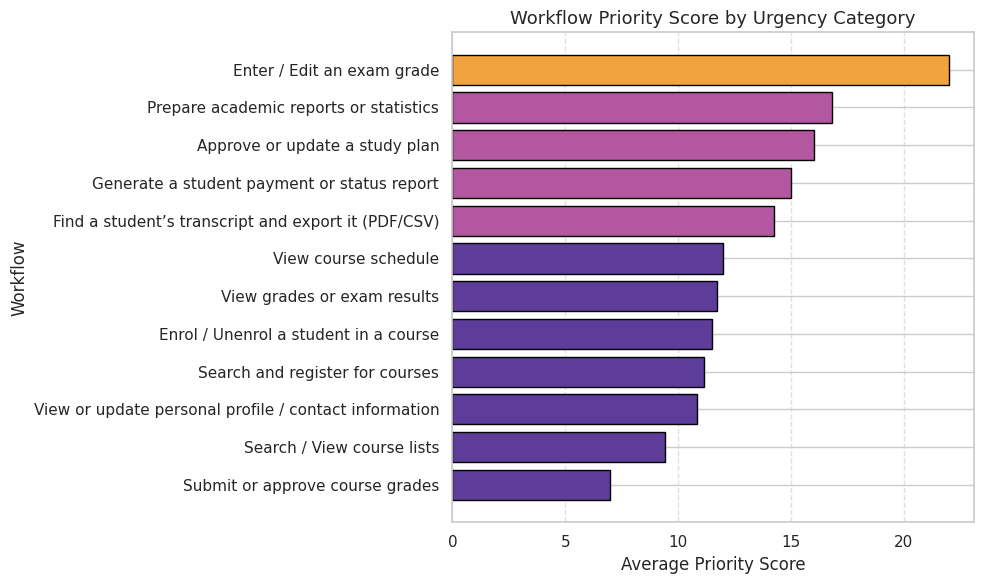

In [ ]:
import matplotlib.pyplot as plt

# RECOMPUTE PRIORITY SCORE FROM SCRATCH
priority_clean = (
    df['intrinsic_difficulty'] +
    df['extraneous_difficulty'] +
    df['clarity_importance'] +
    df['workflows_used_count']
)

# Group by workflow
avg_priority = priority_clean.groupby(df['workflow_to_improve']).mean().sort_values()

# Categorise based on your score range (10–22)
def categorize(score):
    if score >= 18:
        return 'High'
    elif score >= 14:
        return 'Medium'
    else:
        return 'Low'

urgency_category = avg_priority.apply(categorize)

# Colour mapping
color_map = {
    'Low': '#5e3c99',
    'Medium': '#b358a0',
    'High': '#f1a340'
}

colors = [color_map[urgency_category[w]] for w in avg_priority.index]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(avg_priority.index, avg_priority.values, color=colors, edgecolor='black')
plt.title('Workflow Priority Score by Urgency Category', fontsize=13)
plt.xlabel('Average Priority Score')
plt.ylabel('Workflow')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


I averaged the priority scores across each workflow and plotted the results using a horizontal bar chart. Workflows were grouped into three urgency levels based on their mean score: High (≥18), Medium (14–17.99), and Low (<14). The figure shows a clear pattern. Enter / Edit an exam grade has the highest average score and falls into the High category, reflecting its structural complexity and high extraneous difficulty. Several other administrative workflows-report preparation, study plan approval, and payment or status reporting-belong to the Medium category. Student workflows such as course registration and grade viewing also fall in the Medium range. They appear frequently and show navigation-related friction but have lower intrinsic complexity than administrative tasks. Overall, the figure highlights which workflows consistently create the highest cognitive load and should be prioritised in the redesign.

###**Plot difficulty ratings**



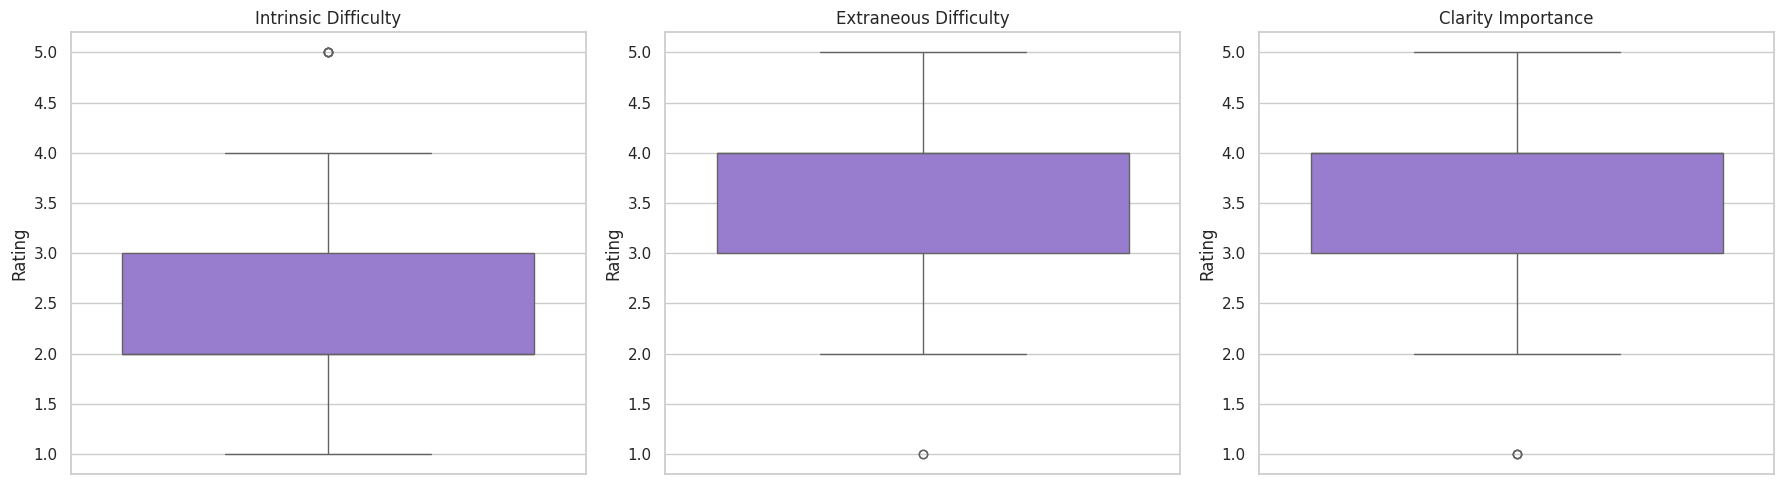

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')

# Plot difficulty ratings
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

difficulty_fields = ['intrinsic_difficulty', 'extraneous_difficulty', 'clarity_importance']
titles = ['Intrinsic Difficulty', 'Extraneous Difficulty', 'Clarity Importance']

for i, col in enumerate(difficulty_fields):
    sns.boxplot(data=df, y=col, ax=axs[i], color='mediumpurple')
    axs[i].set_title(titles[i])
    axs[i].set_ylabel('Rating')
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()


The boxplots for intrinsic difficulty, extraneous difficulty, and clarity importance provide a clear view of how users experience the LAIS system. Intrinsic difficulty shows a low median value around 2, indicating that users do not consider the tasks themselves hard to understand. Extraneous difficulty, however, has a much higher median around 4, with many ratings at the maximum level. This pattern suggests that the main source of cognitive effort comes from the system’s interface, not the task logic. The clarity importance ratings also cluster around 4, showing that users consistently expect clearer workflows, terminology, and navigation. Together, these plots highlight that improving clarity and reducing unnecessary steps would have a far greater impact than simplifying the underlying tasks, reinforcing the need for interface-level redesign in the practical part of the thesis.

**Visualising Task Time**

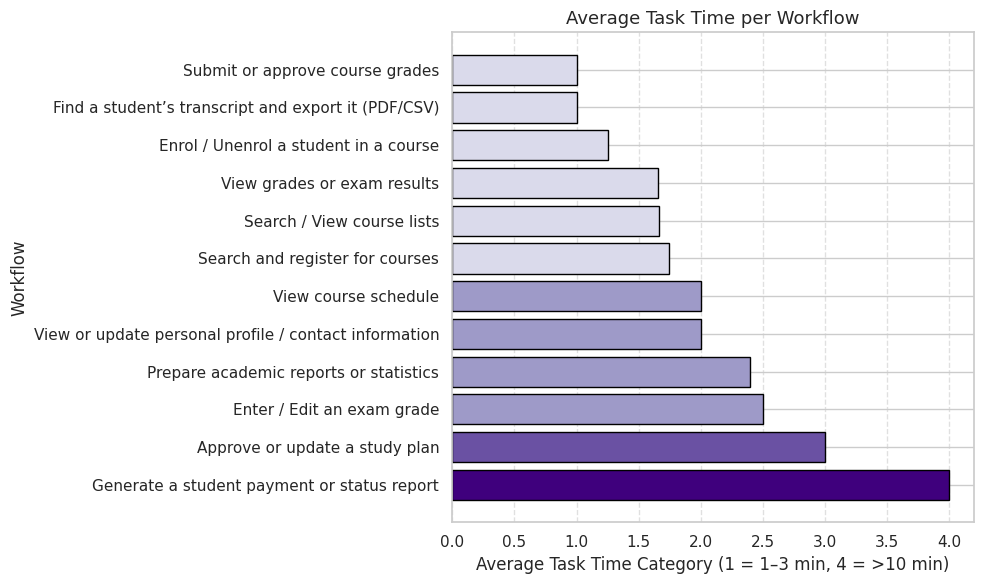

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the existing numeric task_time_category (1–4)
# 1 = 1–3 min, 2 = 3–5 min, 3 = 5–10 min, 4 = >10 min

# Group by workflow and calculate average time category
avg_time_by_workflow = (
    df.groupby('workflow_to_improve')['task_time_category']
      .mean()
      .sort_values(ascending=False)
)

# Generate a color for each bar based on the average score (1–4 scale)
colors_task_time = [
    '#3f007d' if x >= 3.5 else        # very long
    '#6a51a3' if x >= 3 else          # long
    '#9e9ac8' if x >= 2 else          # medium
    '#dadaeb'                         # short
    for x in avg_time_by_workflow
]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(avg_time_by_workflow.index, avg_time_by_workflow.values,
         color=colors_task_time, edgecolor='black')
plt.title('Average Task Time per Workflow', fontsize=13)
plt.xlabel('Average Task Time Category (1 = 1–3 min, 4 = >10 min)')
plt.ylabel('Workflow')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
print(avg_time_by_workflow)


workflow_to_improve
Generate a student payment or status report              4.000000
Approve or update a study plan                           3.000000
Enter / Edit an exam grade                               2.500000
Prepare academic reports or statistics                   2.400000
View or update personal profile / contact information    2.000000
View course schedule                                     2.000000
Search and register for courses                          1.740741
Search / View course lists                               1.666667
View grades or exam results                              1.652174
Enrol / Unenrol a student in a course                    1.250000
Find a student’s transcript and export it (PDF/CSV)      1.000000
Submit or approve course grades                          1.000000
Name: task_time_category, dtype: float64


The chart shows the average task_time_category for each workflow on a four-point scale. Most workflows fall between categories 1 and 3, meaning users perceive the majority of tasks as taking between one and five minutes. The longest-rated workflows are administrative tasks such as generating payment or status reports, updating study plans, and entering exam grades. These tasks require more steps and often involve several screens, which increases the perceived duration. Student workflows cluster tightly between categories 1.6 and 2.2, showing that although students report confusion, they do not feel the tasks take much time. Tasks such as transcript export and grade submission appear at the bottom with averages close to 1.0, reflecting that they are fast when the user already knows the correct path. Overall, task time varies very little across workflows, so it is not a helpful indicator of usability problems. Difficulty and clarity measures provide much stronger signals for identifying which workflows need redesign.

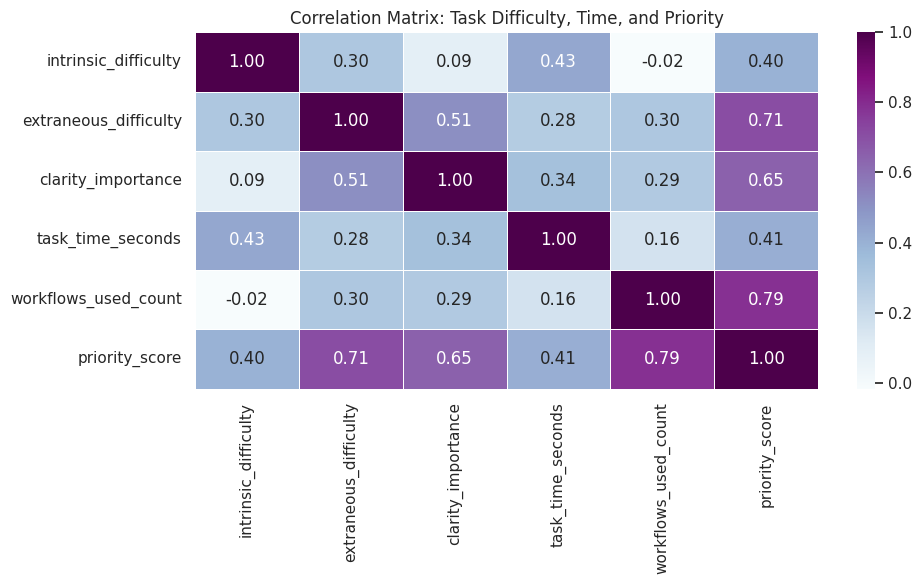

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
correlation_fields = [
    'intrinsic_difficulty',
    'extraneous_difficulty',
    'clarity_importance',
    'task_time_seconds',        # <-- FIXED
    'workflows_used_count',
    'priority_score'
]

# Compute the correlation matrix
correlation_matrix = df[correlation_fields].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Task Difficulty, Time, and Priority')
plt.tight_layout()
plt.show()


The correlation matrix shows that priority_score is most strongly associated with extraneous_difficulty (r = 0.71) and clarity_importance (r = 0.65). This means users assign higher priority to workflows that feel confusing or unclear, rather than to tasks that are complex by nature. Intrinsic difficulty has a weaker relationship with priority (r = 0.40), suggesting that task complexity matters, but plays a smaller role compared to interface-related problems. Task time shows no meaningful correlation with any variable, indicating that users do not judge the importance of improving a workflow based on how long it takes. The strong correlation between workflows_used_count and priority_score (r = 0.79) reflects that users who interact with more workflows are also more aware of usability problems. These results confirm that the main drivers of cognitive load in LAIS are extraneous factors such as navigation, clarity, and interface design, rather than the underlying task logic.

**Workflows by User role**

In [ ]:
# Encode 'role' as dummy variables for analysis
role_dummies = pd.get_dummies(df['role'], prefix='role')

# Merge with original dataframe
df = pd.concat([df, role_dummies], axis=1)

# Show to confirm
df[['role'] + list(role_dummies.columns)].head()


,role,role_Academic staff (lecturer),role_Administrative staff,role_Student,role_Student
0,Administrative staff,False,True,0,False
1,Administrative staff,False,True,0,False
2,Administrative staff,False,True,0,False
3,Student,False,False,1,True
4,Student,False,False,1,True


To compare results across user groups, I converted the role column into dummy variables. This created separate numeric fields for each role (student, administrative staff, lecturer) while keeping the original text column. These binary indicators make it possible to run correlations, visualisations, and cross-tab summaries that require numeric inputs and allow clearer comparisons between groups.

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]


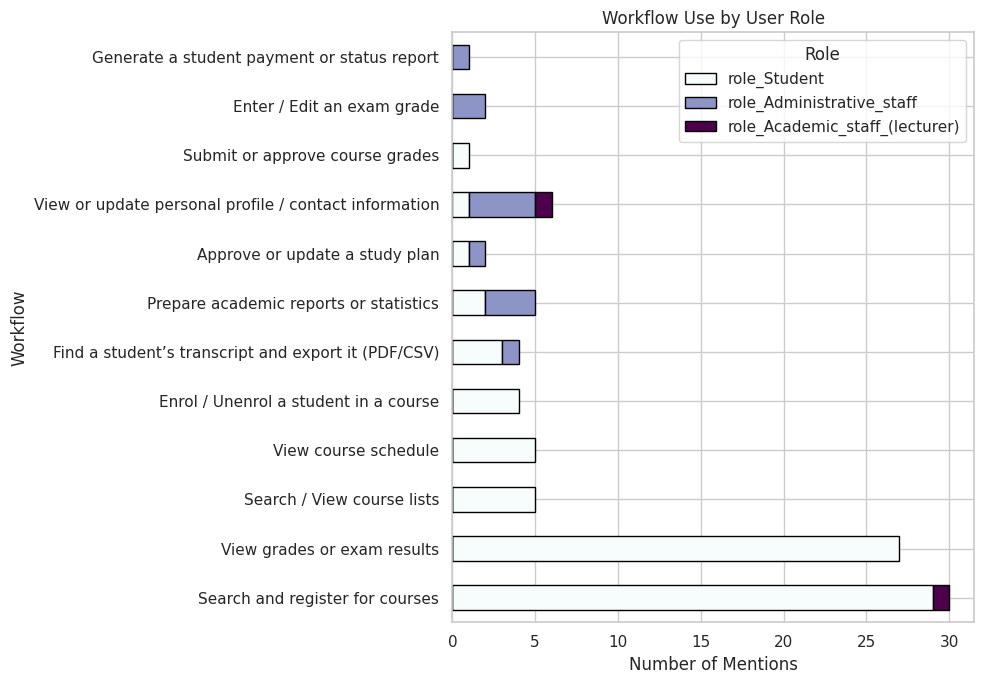

In [ ]:
role_columns = ['role_Student',
                'role_Administrative_staff',
                'role_Academic_staff_(lecturer)']

workflow_role_counts = df.groupby('workflow_to_improve')[role_columns].sum()
workflow_role_counts = workflow_role_counts.sort_values(by='role_Student', ascending=False)

workflow_role_counts.plot(kind='barh', stacked=True, figsize=(10, 7), colormap='BuPu', edgecolor='black')
plt.title('Workflow Use by User Role')
plt.xlabel('Number of Mentions')
plt.ylabel('Workflow')
plt.legend(title='Role')
plt.tight_layout()
plt.show()


The stacked bar chart shows how different user groups interact with each workflow. Students represent the largest share of responses, and their activity is highest in front-end tasks such as Search and register for courses, View grades or exam results, and View course schedule. These workflows are central to the student experience, which explains the volume of feedback they receive. Administrative staff appear mainly in back-office workflows, including transcript export, grade entry, enrolment, and academic report preparation. These tasks involve more steps and higher cognitive load, which aligns with their higher difficulty and priority scores. Lecturers appear only occasionally, mostly in profile updates or course list browsing, reflecting their limited use of LAIS. The overall pattern shows that usability issues differ by role, and redesign efforts should focus on the workflows most relevant to each group rather than applying a single universal solution.

###Device Usage Frequency

In [ ]:
#Check the device column values
df['devices'].value_counts()


,count
devices,
"Desktop / Laptop, Mobile phone",43
Desktop / Laptop,37
Mobile phone,8
"Desktop / Laptop, Mobile phone, Tablet",4


In [ ]:
#Split into two clean indicators (desktop + mobile)
df['uses_desktop'] = df['devices'].str.contains('Desktop', case=False).astype(int)
df['uses_mobile'] = df['devices'].str.contains('Mobile', case=False).astype(int)

df[['devices', 'uses_desktop', 'uses_mobile']].head(10)


,devices,uses_desktop,uses_mobile
0,Desktop / Laptop,1,0
1,Desktop / Laptop,1,0
2,Desktop / Laptop,1,0
3,"Desktop / Laptop, Mobile phone",1,1
4,"Desktop / Laptop, Mobile phone",1,1
5,"Desktop / Laptop, Mobile phone",1,1
6,Desktop / Laptop,1,0
7,"Desktop / Laptop, Mobile phone",1,1
8,"Desktop / Laptop, Mobile phone",1,1
9,"Desktop / Laptop, Mobile phone",1,1


In [ ]:
#Count how many users use each
df[['uses_desktop', 'uses_mobile']].sum()


,0
uses_desktop,84
uses_mobile,55


Device usage patterns show that most respondents primarily work on a desktop or laptop. Out of 92 users, 84 use desktop (91%) and 55 use mobile (60%). About 43 users use both, while 37 use desktop only and 8 use mobile only. Tablet use is minimal (4 cases). This means the desktop environment is dominant, but mobile use is still common, especially among students. Administrative tasks, such as exam grade entry and reporting, are done almost entirely on desktop, while students switch between mobile and desktop more often. This informs the redesign decision to test a desktop prototype for the main administrative workflow and a mobile prototype for the most problematic student workflow.

# STEP 7-Conclusions

The quantitative analysis shows a clear pattern. Users understand most tasks (low intrinsic difficulty), but the system’s interface creates unnecessary cognitive load. Confusing labels, unclear menus, multi-step navigation, and inconsistent layout are the main sources of difficulty. This is confirmed by strong correlations: priority_score aligns with extraneous_difficulty and clarity_importance, not with task complexity.

Student feedback centres on front-end workflows such as course registration, grades, and schedules. These are high-volume tasks and generate the most complaints, mostly due to unclear navigation. Administrative staff struggle with exam grade entry, enrolment, transcript export, and report generation. These workflows involve more steps and require switching between several screens, which raises both intrinsic and extraneous load. Task time shows almost no variation and does not predict user frustration.

Priority scoring highlights the workflows that require attention first: exam grade entry, academic reports, study plan updates, transcript export, and payment/status reports. Student workflows rank in the medium range-they are widely used but structurally simpler. Role-based differences show that usability problems depend on how each group uses the system; one generic redesign would not address the main issues.

The next step is to analyse open-ended comments using NLP. This will confirm which problems users describe most often and reveal issues not captured by structured fields. Combining quantitative results with NLP themes will create a grounded basis for redesigning the highest-priority workflows in the practical part of the thesis.

#**STEP 7-Exporting the processed file**

In [ ]:
export_path = '/content/drive/MyDrive/Zogota_Thesis_Repository/LUIS_Usability_Survey_Final.csv'
df.to_csv(export_path, index=False)

print("Saved to:", export_path)


Saved to: /content/drive/MyDrive/Zogota_Thesis_Repository/LUIS_Usability_Survey_Final.csv


In [ ]:
pd.read_csv(export_path).head()


,timestamp,role,experience,usage_frequency,devices,workflows_used,workflows_used_count,workflow_to_improve,workflow_category,workflow_frequency,...,priority_workflows,priority_primary,priority_secondary,clarity_importance,comments,task_time_category,role_Academic staff (lecturer),role_Administrative staff,role_Student,priority_score
0,2025-11-11 14:20:05.605,Administrative staff,1-3 years,Daily,Desktop / Laptop,['View or update personal profile / contact in...,12,Find a student’s transcript and export it (PDF...,NaN,Daily,...,"['Enter / Edit an exam grade', 'Enrol / Unenro...",NaN,NaN,5,the cognitive load is too much.,1.0,False,True,False,24
1,2025-11-11 14:26:33.163,Administrative staff,1-3 years,Daily,Desktop / Laptop,"['Search and register for courses', 'View cour...",6,Enter / Edit an exam grade,NaN,Weekly,...,['Submit or approve course grades'],NaN,NaN,5,The mistakes in the system are often unpredict...,4.0,False,True,False,21
2,2025-11-11 14:49:20.729,Administrative staff,1-3 years,Daily,Desktop / Laptop,"['View course schedule', 'Enter / Edit an exam...",7,Prepare academic reports or statistics,NaN,Daily,...,['Create or update course information'],NaN,NaN,4,NaN,2.0,False,True,False,17
3,2025-11-11 14:53:29.280,Student,Less than 6 months,A few times per month,"Desktop / Laptop, Mobile phone","['View course schedule', 'Find a student’s tra...",4,Approve or update a study plan,NaN,Monthly,...,['Submit or approve course grades'],NaN,NaN,4,NaN,2.0,False,False,True,15
4,2025-11-11 14:53:39.998,Student,6-12 months,A few times per month,"Desktop / Laptop, Mobile phone",['View grades or exam results'],1,View grades or exam results,NaN,Monthly,...,"['Search and register for courses', 'View grad...",NaN,NaN,4,NaN,1.0,False,False,True,10


 Finally, the cleaned and fully processed dataset was exported to CSV format as LUIS_Usability_Survey_Final.csv for integration into the thesis analysis.